### Report plots
This is a notebook for generatig all the plots in the paper.

Make sure to have run the master_training and master_testing notebooks for all 6 models before running this!

In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Change working directory to Project folder, you may change this as needed
%cd "/content/drive/MyDrive/Machine_Learning_(CS-433)/Project_2"

#Import libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine_Learning_(CS-433)/Project_2


In [29]:
#model_codes = ["rnafm", "rnamsm", "ernierna", "splicebert", "utrlm-te_el", "rnabert"] # How they are refered in multimolecule
#model_names = ["RNA-FM", "RNA-MSM", "ERNIERNA", "SpliceBERT", "UTR-LM", "RNABERT"] # How their names are usually written
#model_colors = ["indianred", "chocolate", "darkorange", "darkseagreen", "aquamarine", "fuchsia"]

model_codes = ["rnabert"]
model_names = ["RNABERT"]
model_colors = ["fuchsia"]

### Precision recall curves

In [30]:
list_of_codes = model_codes + ["baseline"]
list_of_names = model_names + ["Baseline"]
list_of_colors = model_colors + ["k"]

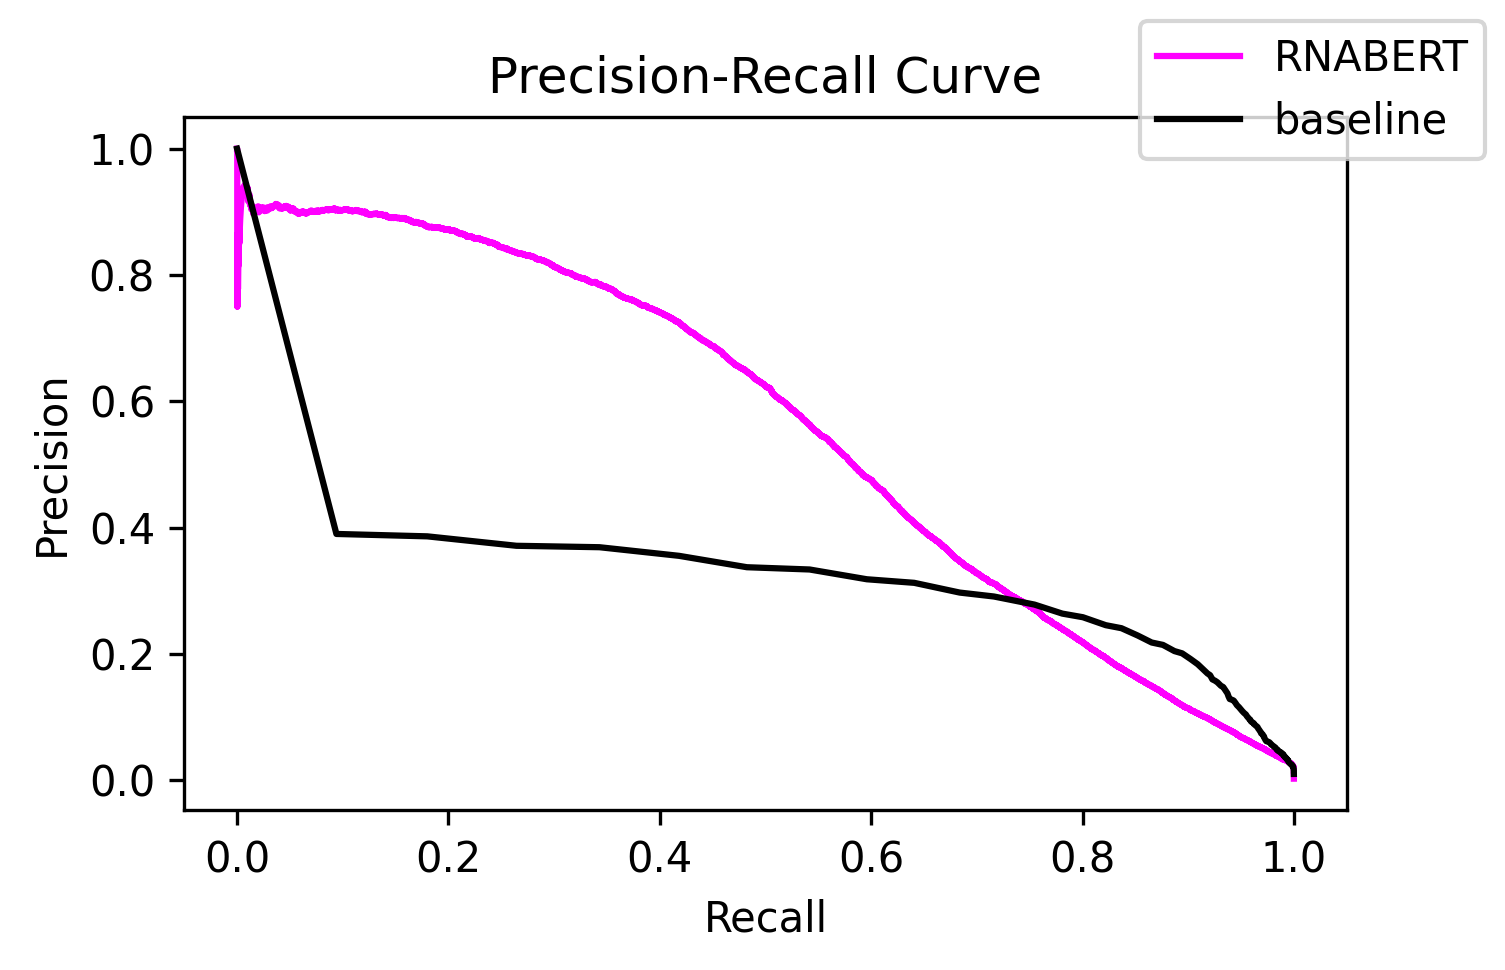

In [31]:
fig, ax = plt.subplots(dpi = 300, figsize = (5,3))
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")
ax.set_title("Precision-Recall Curve", fontsize = 12)

for i, code in enumerate(list_of_codes):
  data = np.genfromtxt("pr_curve_test_" + code + ".txt")
  ax.plot(data[:,1], data[:,0], list_of_colors[i], label = list_of_names[i])

fig.legend()
fig.savefig("Precision-Recall Curve.png")



### Eval loss and sequence accuracy during training

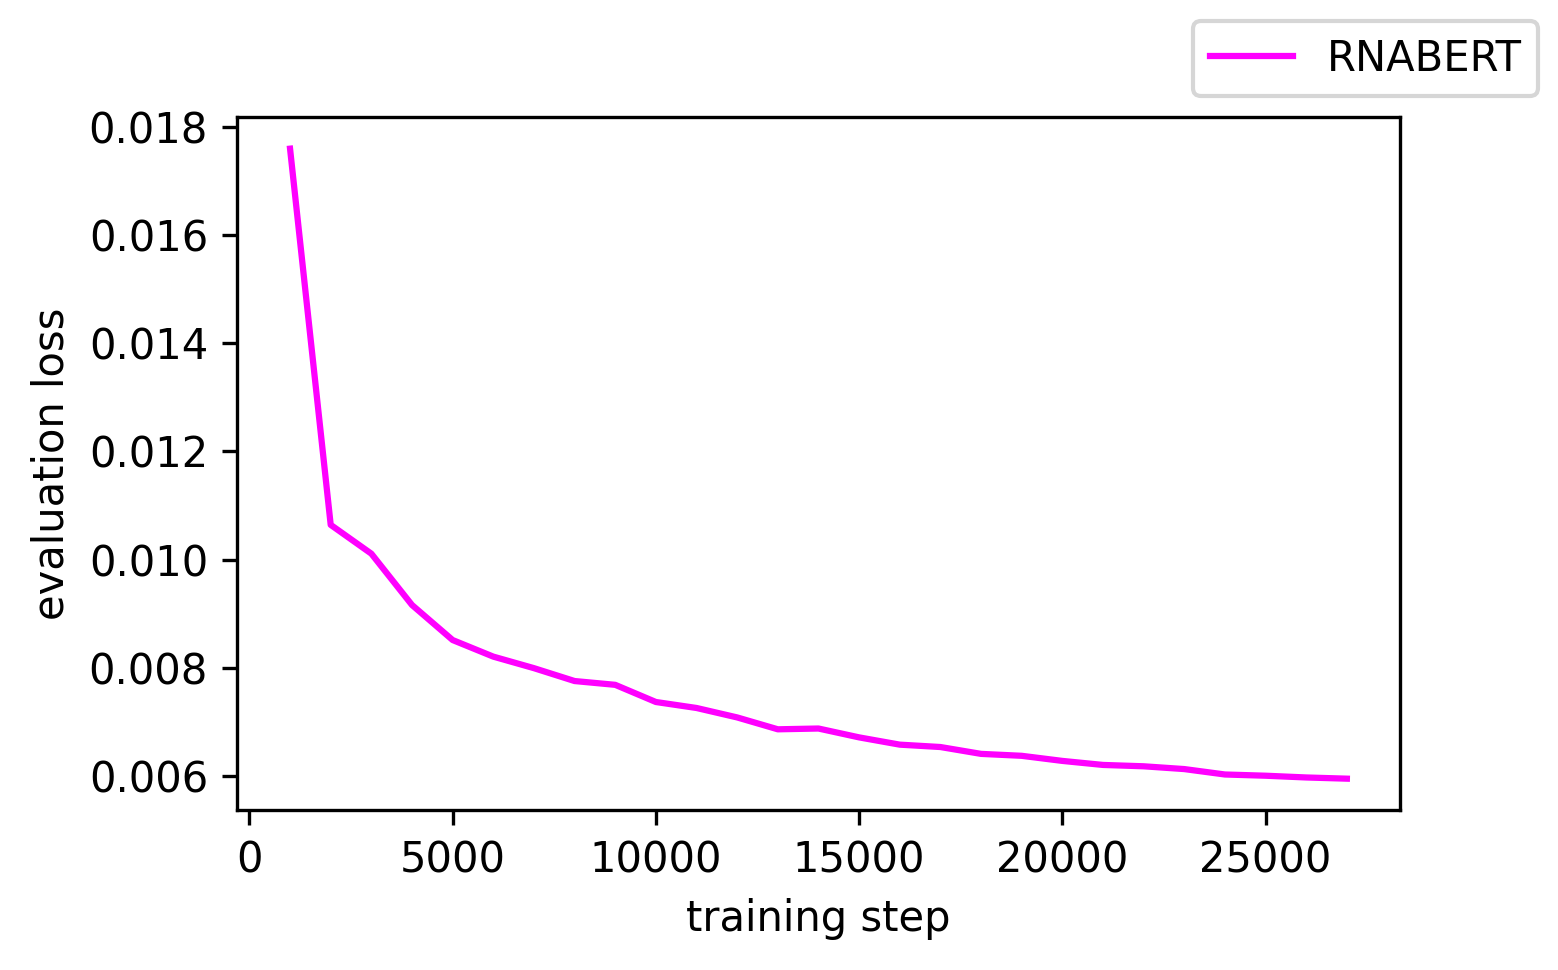

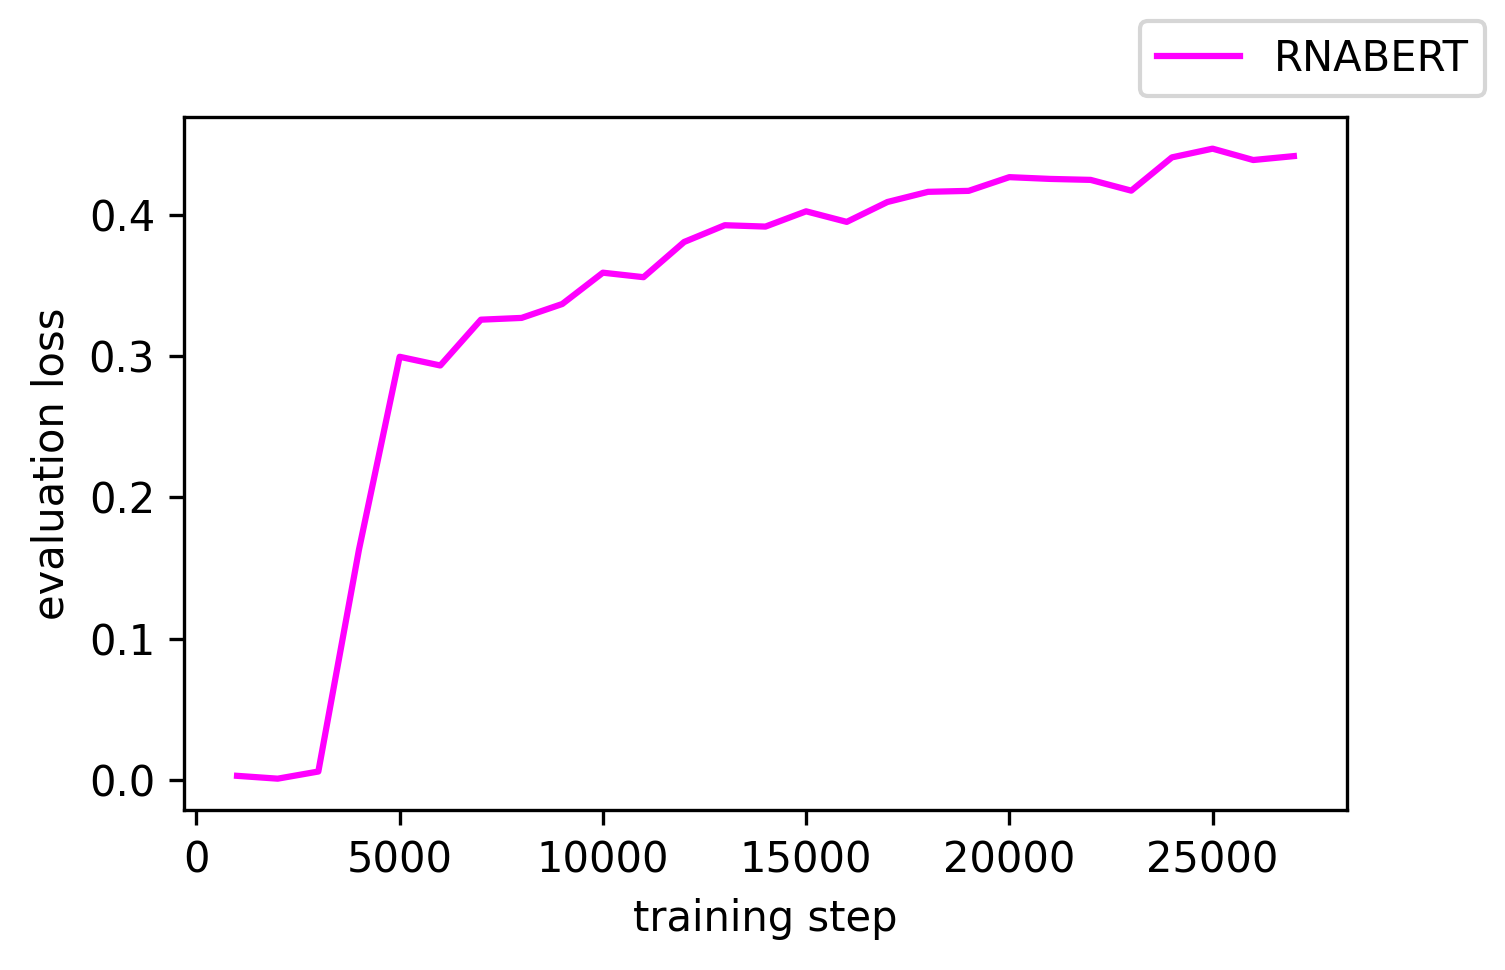

In [36]:
fig_loss, ax_loss = plt.subplots(dpi = 300, figsize = (5,3))
ax_loss.set_ylabel("evaluation loss")
ax_loss.set_xlabel("training step")

fig_acc, ax_acc = plt.subplots(dpi = 300, figsize = (5,3))
ax_acc.set_ylabel("evaluation loss")
ax_acc.set_xlabel("training step")


for i, code in enumerate(model_codes):
  df = pd.read_csv(f"multimolecule-{code}-finetuned-secondary-structure/eval_metrics.csv" )
  ax_loss.plot(df["step"], df["eval_loss"], model_colors[i], label = model_names[i])
  ax_acc.plot(df["step"], df["eval_seq_accuracy"], model_colors[i], label = model_names[i])


fig_loss.legend()
fig_loss.savefig("eval_loss_training.png")

fig_acc.legend()
fig_acc.savefig("seq_acc_training.png")


In [35]:
model_names

['RNABERT']